In [55]:
%matplotlib inline

import os 
import time
import librosa
import IPython
import librosa.display
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util

import matplotlib.pyplot as plt

importlib.reload(util)


<module 'pr_util' from '/Users/felipefelix/USP/tcc/code/pr_util.py'>

In [24]:
y, sr = librosa.load('Rexp/100041.filtered1.wav')

178432


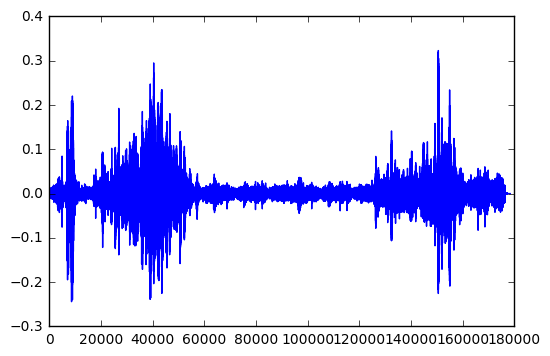

In [3]:
print(len(y))
matplotlib.pyplot.plot(y)

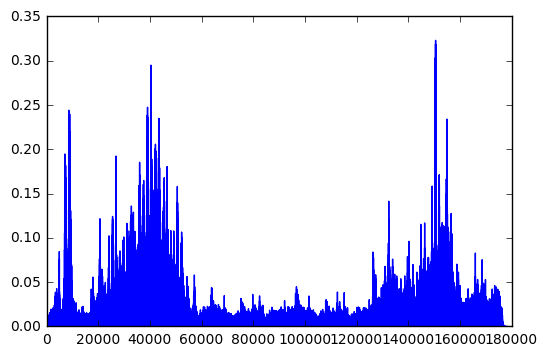

In [4]:
matplotlib.pyplot.plot(np.abs(y))

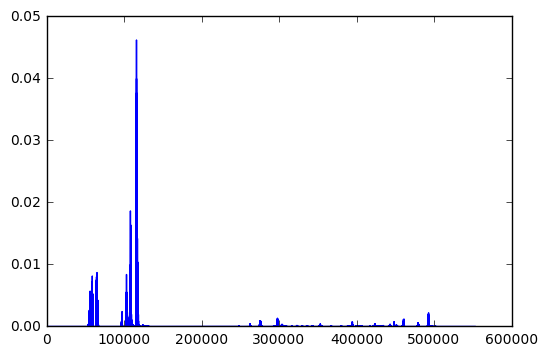

In [44]:
matplotlib.pyplot.plot(np.abs(y)**2)

In [95]:
def autodetec(y, power, thres, signal_or_change = 'signal'):
    N = len(y)
    y_env = np.abs(y) ** power
    print('máximo do envelope {}'.format(np.max(y_env)))
    print('mínimo do envelope {}'.format(np.min(y_env)))
    print('média do envelope {}'.format(np.mean(y_env)))
    thres = np.mean(y_env) * 10
    y2 = np.zeros(N)
    menor = 0
    maior = 0
    
    for y in y_env:
        if y <= thres:
            menor += 1
        else:
            maior += 1
        
    y2[y_env <= thres] = 1
    y2[y_env  > thres] = 2

    print('pct menores: {}'.format(menor/(menor+maior)))
    print('pct maiores: {}'.format(maior/(menor+maior)))

    ## y3: { 2 = silence; 3 = change, 4 = signal}
    
    y3 = (y2[:-1] + y2[1:]).copy()
    
    y3[0] = 3
    y3[-1] = 3
    
    if signal_or_change == 'change':
        return np.where(y3 == 3)[0]
    else: 
        return np.where(y3 == 4)[0]


markers_on = autodetec(y, 2, 0.2)

máximo do envelope 0.0027782623656094074
mínimo do envelope 1.835778063460879e-18
média do envelope 2.289875737915281e-06
pct menores: 0.9885966242973939
pct maiores: 0.01140337570260603


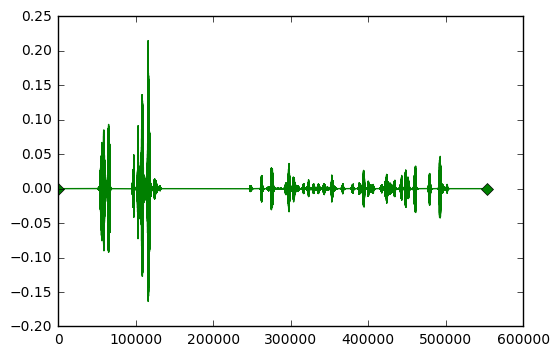

In [43]:
plt.plot(y, '-gD', markevery = markers_on.tolist())

In [113]:
def plot_with_marks(y, power, thres, n_fft, signal_or_change = 'signal', save_pic = False):
    markers_on = autodetec(y, power, thres, signal_or_change)
    markers_on = markers_on.tolist()
    D = librosa.stft(y, hop_length = n_fft, n_fft = n_fft)
    #print(D.shape)
    #print(np.max(D))
    D = librosa.amplitude_to_db(D, ref=np.max)
    print(D.shape)
    M, N = D.shape
    #print(np.min(D))
    
    for frame in markers_on:
        #print(int(np.floor(frame/n_fft)))
        D[:int(M/20), int(np.floor(frame/n_fft))] = 10
        
    #D[:,200] = -80
    librosa.display.specshow(D, y_axis='log', x_axis='time')
    plt.title('Power spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    if (save_pic): plt.savefig("../pics/file.power_{}.thres_{}.nfft_{}.svg".format(power, thres, n_fft))
    return markers_on


#plot_with_marks(y, 2, 0.2, 2048)

máximo do envelope 0.3230019211769104
mínimo do envelope 0.0
média do envelope 0.012780209071934223
pct menores: 0.9959592449784792
pct maiores: 0.004040755021520803
(1025, 88)


[7032,
 7063,
 7073,
 8591,
 8606,
 8609,
 8635,
 8638,
 8726,
 8932,
 8935,
 8938,
 8952,
 8957,
 8960,
 8963,
 9001,
 9004,
 9008,
 9012,
 9015,
 26897,
 26912,
 26927,
 36022,
 36047,
 36062,
 37587,
 38770,
 38845,
 38902,
 38974,
 39012,
 39027,
 39031,
 39034,
 39037,
 39041,
 39066,
 39081,
 39084,
 39085,
 39088,
 39095,
 39098,
 39102,
 39113,
 39243,
 39268,
 39314,
 40275,
 40319,
 40333,
 40363,
 40377,
 40384,
 40391,
 40405,
 40406,
 40419,
 40420,
 40427,
 40434,
 40435,
 40441,
 40449,
 40453,
 40463,
 40471,
 40563,
 40647,
 40662,
 40703,
 40706,
 40720,
 40736,
 40758,
 40765,
 40772,
 41945,
 41962,
 42107,
 42136,
 42148,
 42160,
 42165,
 42172,
 42245,
 42250,
 42308,
 42376,
 43386,
 43401,
 43430,
 43445,
 43459,
 43474,
 43488,
 43495,
 43503,
 43517,
 43531,
 43538,
 43541,
 43546,
 43547,
 43548,
 43553,
 43560,
 43563,
 43589,
 43649,
 43755,
 46586,
 46601,
 46616,
 46661,
 46676,
 50620,
 50646,
 149250,
 150401,
 150427,
 150428,
 150431,
 150439,
 150443

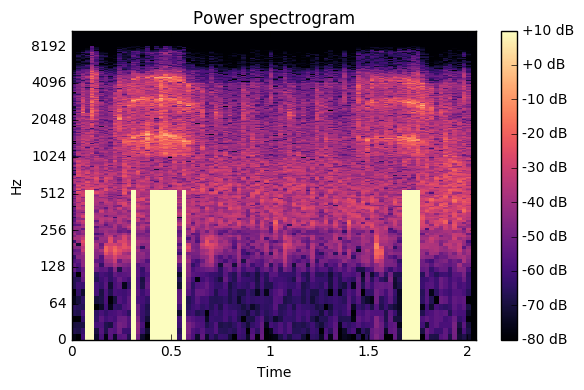

In [137]:
#for i in range(100):
#    for pot in range(1, 5):
#        time.sleep(0.100)
#        plot_with_marks(y, pot, i/100.0, 2048)
#        plt.close('all')
y, sr = librosa.load('Rexp/100041.filtered1.wav')
plot_with_marks(y, 1, 0.07, 2048)

In [130]:
file_dirs = util.return_random_audio(util.choose_species(1))
print(file_dirs)


['/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Polioptila dumicola/song/10013.mp3', '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Polioptila dumicola/song/10013.mp3.filtered1.wav', '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Polioptila dumicola/song/10013.mp3.filtered2.wav']


In [131]:
IPython.display.Audio(file_dirs[0])

máximo do envelope 0.7984620332717896
mínimo do envelope 0.0
média do envelope 0.03933589532971382
pct menores: 0.9966928596583906
pct maiores: 0.0033071403416094383
(1025, 355)


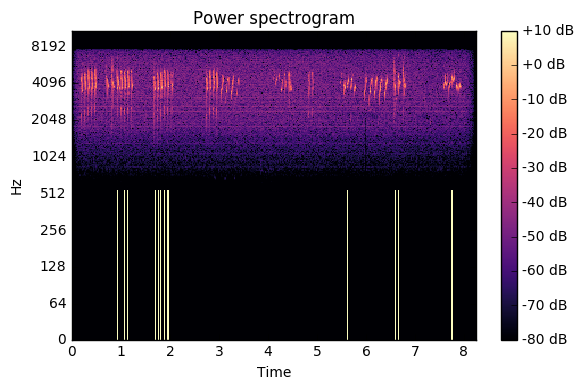

In [132]:
y, sr = librosa.load(file_dirs[0])
markers = plot_with_marks(y, 1, 0.07, 2048, 'signal')

máximo do envelope 0.7984620332717896
mínimo do envelope 0.0
média do envelope 0.03933589532971382
pct menores: 0.9966928596583906
pct maiores: 0.0033071403416094383
(1025, 355)


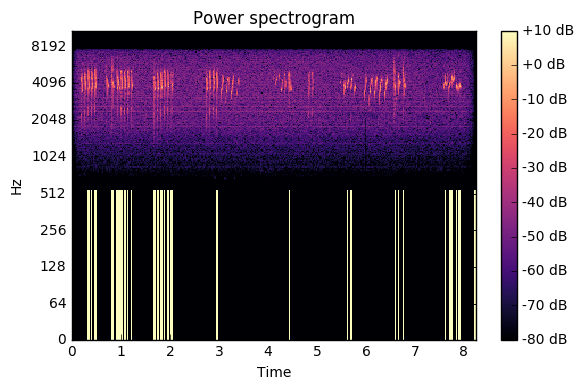

In [133]:
y, sr = librosa.load(file_dirs[0])
markers = plot_with_marks(y, 1, 0.07, 2048, 'change')

In [134]:
IPython.display.Audio(file_dirs[1])

máximo do envelope 0.579494297504425
mínimo do envelope 0.0
média do envelope 0.011463718488812447
pct menores: 0.9760878060056358
pct maiores: 0.023912193994364214
(1025, 355)


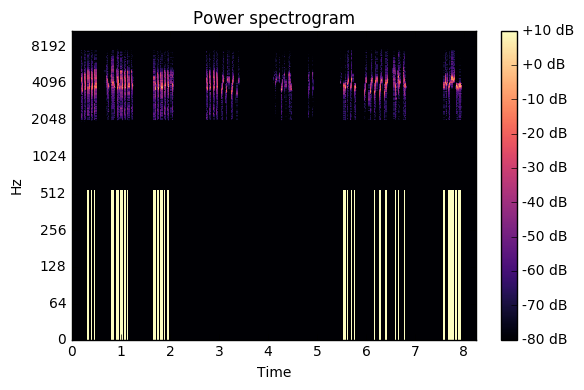

In [135]:
y, sr = librosa.load(file_dirs[1])
markers = plot_with_marks(y, 1, 0.01, 2048, 'signal')

máximo do envelope 0.579494297504425
mínimo do envelope 0.0
média do envelope 0.011463718488812447
pct menores: 0.9760878060056358
pct maiores: 0.023912193994364214
(1025, 355)


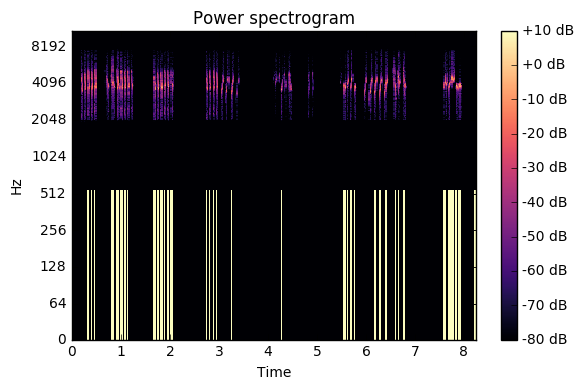

In [136]:
y, sr = librosa.load(file_dirs[1])
markers = plot_with_marks(y, 1, 0.01, 2048, 'change')